In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv("train.csv")
data_train.head()
data_train.shape

(14999, 9)

In [3]:
#Assigning each category a number for Category Feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [4]:
#Removing character F present in Data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [5]:
#Convert values to Integers for views,likes,comment, dislikes and adview
data_train["views"]=pd.to_numeric(data_train["views"])
data_train["comment"]=pd.to_numeric(data_train["comment"])
data_train["likes"]=pd.to_numeric(data_train["likes"])
data_train["dislikes"]=pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])


In [6]:
column_vididd=data_train['vidid']

In [7]:
#Encoding features like Category,Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])


In [8]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [9]:
#Convert Time_in_sec for duration
import datetime
import time

In [10]:
def checki(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h=mm
                mm=''
            elif(i=="M"):
                m=mm
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp=pd.read_csv("train.csv")["duration"]
time=mp.apply(checki)

In [11]:
def func_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600+int(m)*60+int(s)

In [12]:
time1=time.apply(func_sec)

In [13]:
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9005,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


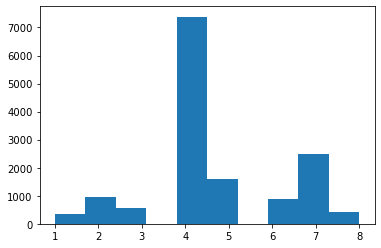

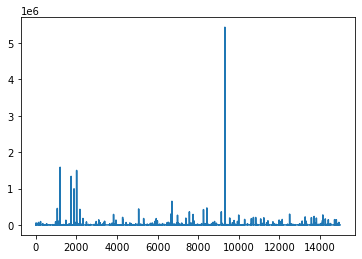

In [14]:
#Visualization
#Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [15]:
#remove videos with adview greater than 2000000 as outlier
data_train=data_train[data_train["adview"]<2000000]

In [16]:
#Heatmap
import seaborn as sns

<ipython-input-17-1c8465aba5b5>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)


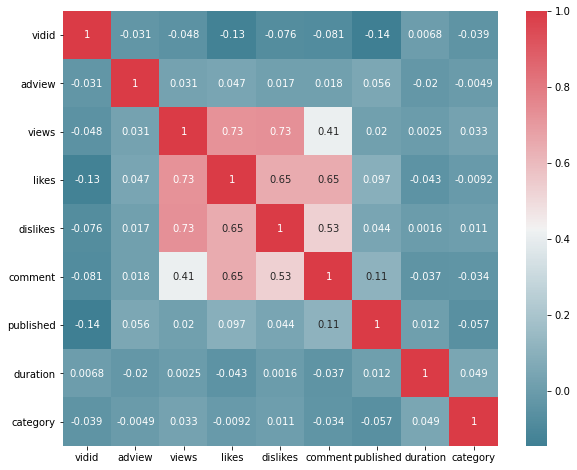

In [17]:
f,ax=plt.subplots(figsize=(10,8))
corr=data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()

In [18]:
Y_train=pd.DataFrame(data=data_train.iloc[:,1].values,columns=['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
X_train.shape

(11708, 7)

In [20]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [21]:
X_train.mean()

0.17381264062741902

In [22]:
#Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction=model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [23]:
#Linear Regression
from sklearn import linear_model
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3707.8322578945595
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


In [24]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
print_error(X_test,y_test,decision_tree)

Mean Absolute Error: 2660.126366120219
Mean Squared Error: 974313573.3053279
Root Mean Squared Error: 31213.9964327756


In [25]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

<ipython-input-25-6c7367018c89>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3202.4599022310053
Mean Squared Error: 497867803.4616204
Root Mean Squared Error: 22312.951473563968


In [26]:
#Support vector Regressor
from sklearn.svm import SVR
support_vector_regressor=SVR()
print_error(X_test,y_test,linear_regression)

Mean Absolute Error: 3707.8322578945595
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


In [27]:
import keras
from keras.layers import Dense
ann=keras.models.Sequential([Dense(6,activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])

In [28]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 0s 650us/step - loss: 767402176.0000 - mean_squared_error: 767402176.0000
Epoch 2/100
366/366 [==============================] - 0s 640us/step - loss: 767389056.0000 - mean_squared_error: 767389056.0000
Epoch 3/100
366/366 [==============================] - 0s 657us/step - loss: 767366080.0000 - mean_squared_error: 767366080.0000
Epoch 4/100
366/366 [==============================] - 0s 647us/step - loss: 767326400.0000 - mean_squared_error: 767326400.0000
Epoch 5/100
366/366 [==============================] - 0s 668us/step - loss: 767263360.0000 - mean_squared_error: 767263360.0000
Epoch 6/100
366/366 [==============================] - 0s 606us/step - loss: 767168192.0000 - mean_squared_error: 767168192.0000
Epoch 7/100
366/366 [==============================] - 0s 599us/step - loss: 767053952.0000 - mean_squared_error: 767053952.0000
Epoch 8/100
366/366 [==============================] - 0s 611us/step - loss: 766923648.0000 - mea

In [29]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [30]:
print_error(X_test,y_test,ann)

Mean Absolute Error: 3217.1993633367815
Mean Squared Error: 829165701.3540791
Root Mean Squared Error: 28795.237476952316


In [31]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [32]:
#Saving Keras Artificial Neutral Network model
ann.save("ann_youtubeadview.h5")

# TESTING

In [33]:
data_test=pd.read_csv("test.csv")

In [34]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [35]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [36]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [37]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [38]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [39]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [40]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [41]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [43]:
prediction = model.predict(X_test)

In [44]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [45]:
prediction = prediction.rename(columns={0: "Adview"})

In [46]:
prediction.head()

,Adview
0,2300.918213
1,2420.951660
2,1149.275024
3,996.800171
4,2206.896973


In [47]:
prediction.to_csv('predictions.csv')